### 1. 데이터 전처리


In [1]:
import statsmodels.api as sm
import sklearn as sk

#### missingno
- 결측치 시각화

In [2]:
titanic = sns.load_dataset("titanic")
titanic.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True

In [3]:
import missingno as msno

msno.matrix(titanic)
plt.show()

In [4]:
msno.bar(titanic)
plt.show()

In [5]:
# 데이터 절반 이상이 없는 열 삭제
titanic = titanic.dropna(thresh=int(len(titanic)/2), axis=1)
msno.matrix(titanic)
plt.show()

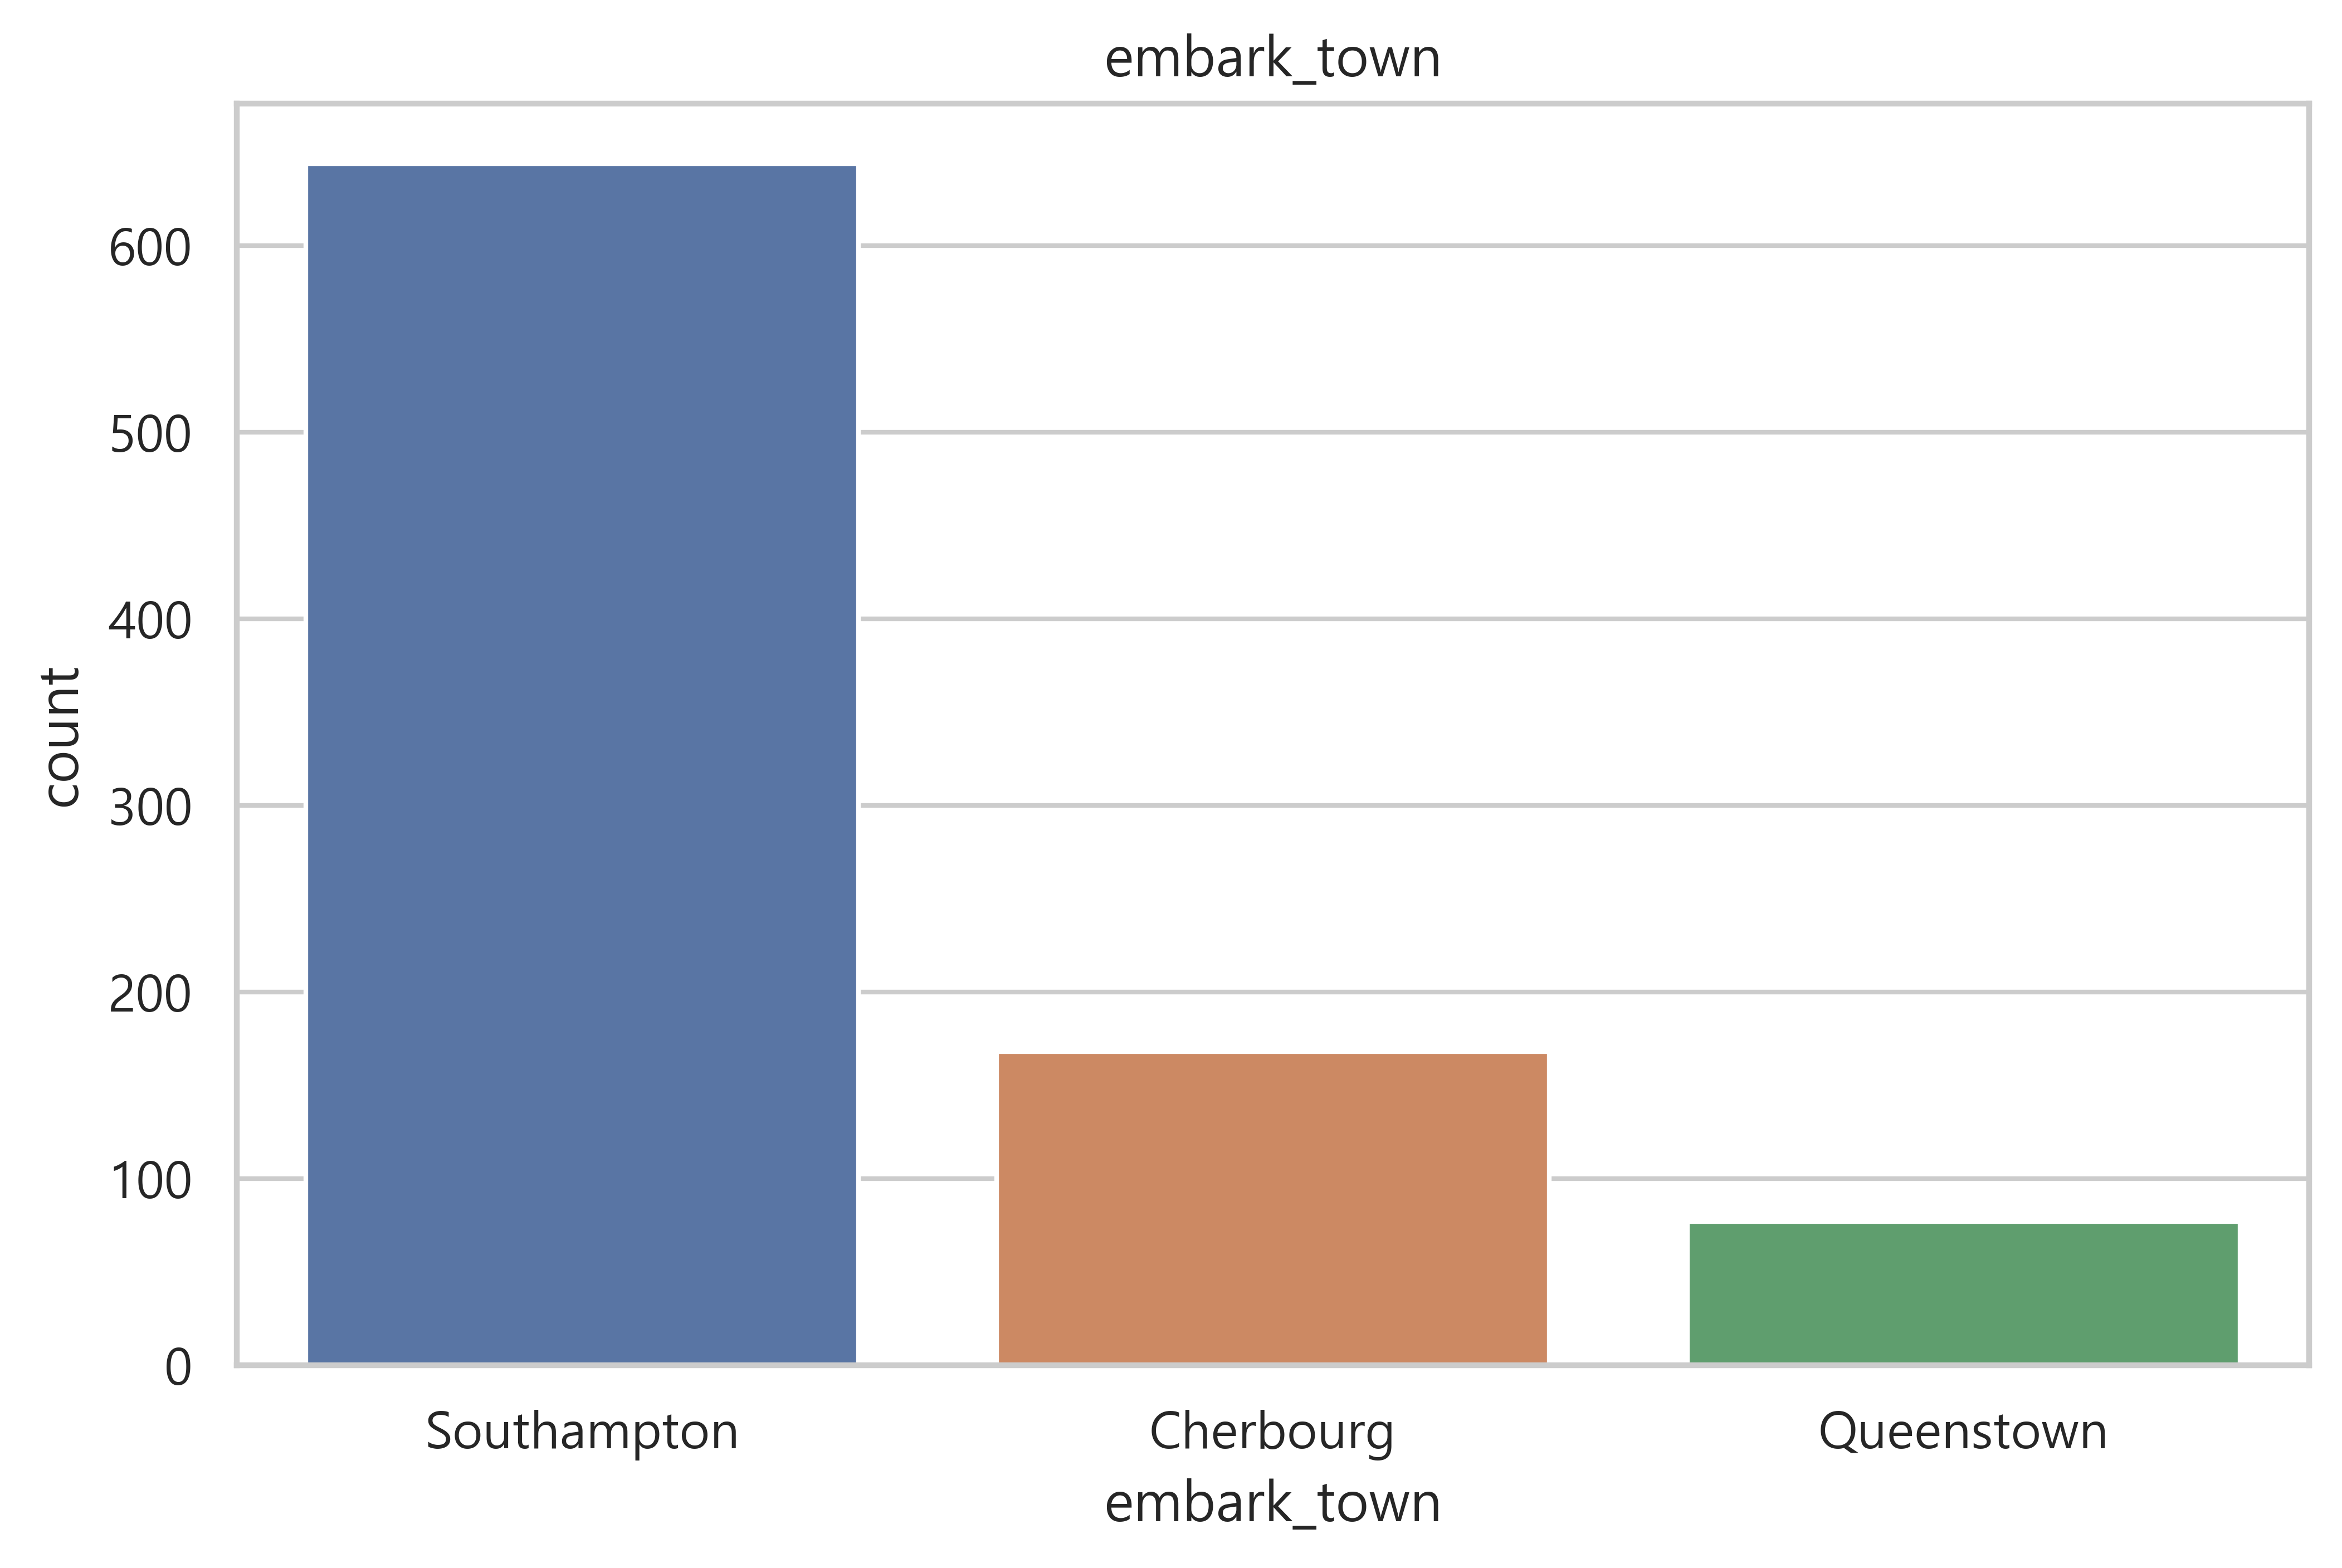

In [6]:
sns.countplot(titanic.embark_town)
plt.title("embark_town")
plt.show()

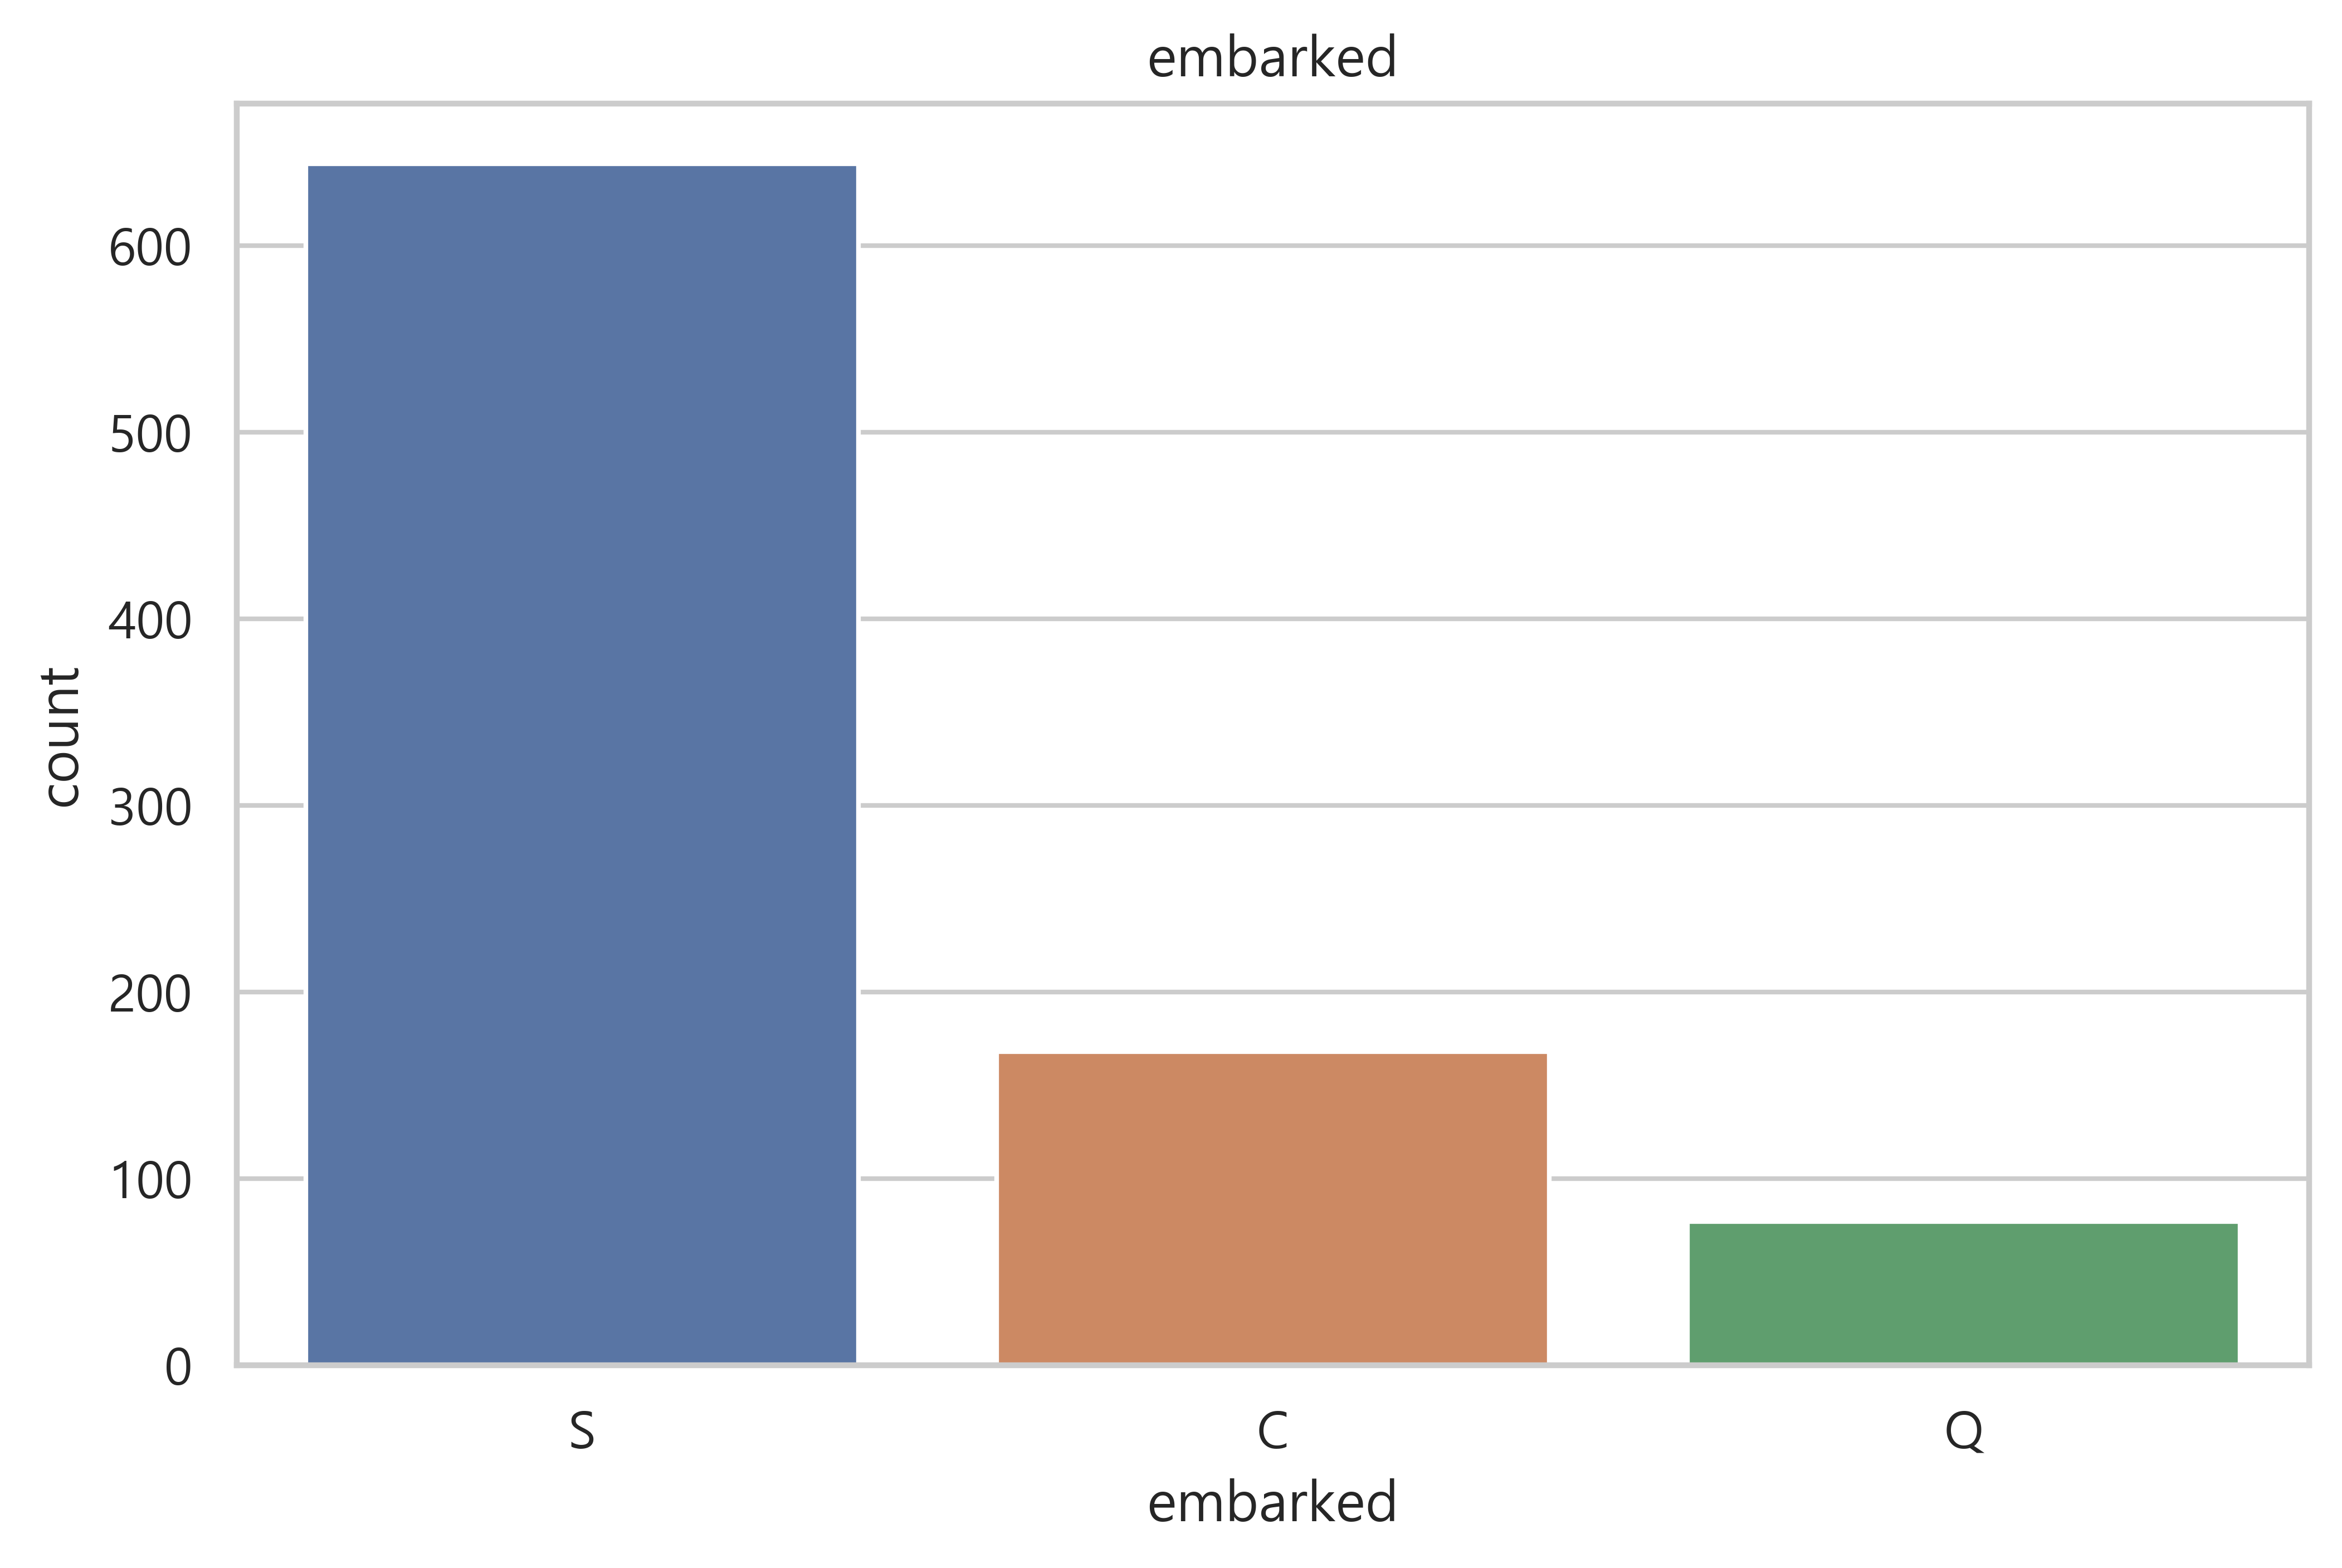

In [7]:
sns.countplot(titanic.embarked)
plt.title("embarked")
plt.show()

In [8]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent") #mean, median, most_frequent
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])


In [9]:
msno.matrix(titanic)
plt.show()

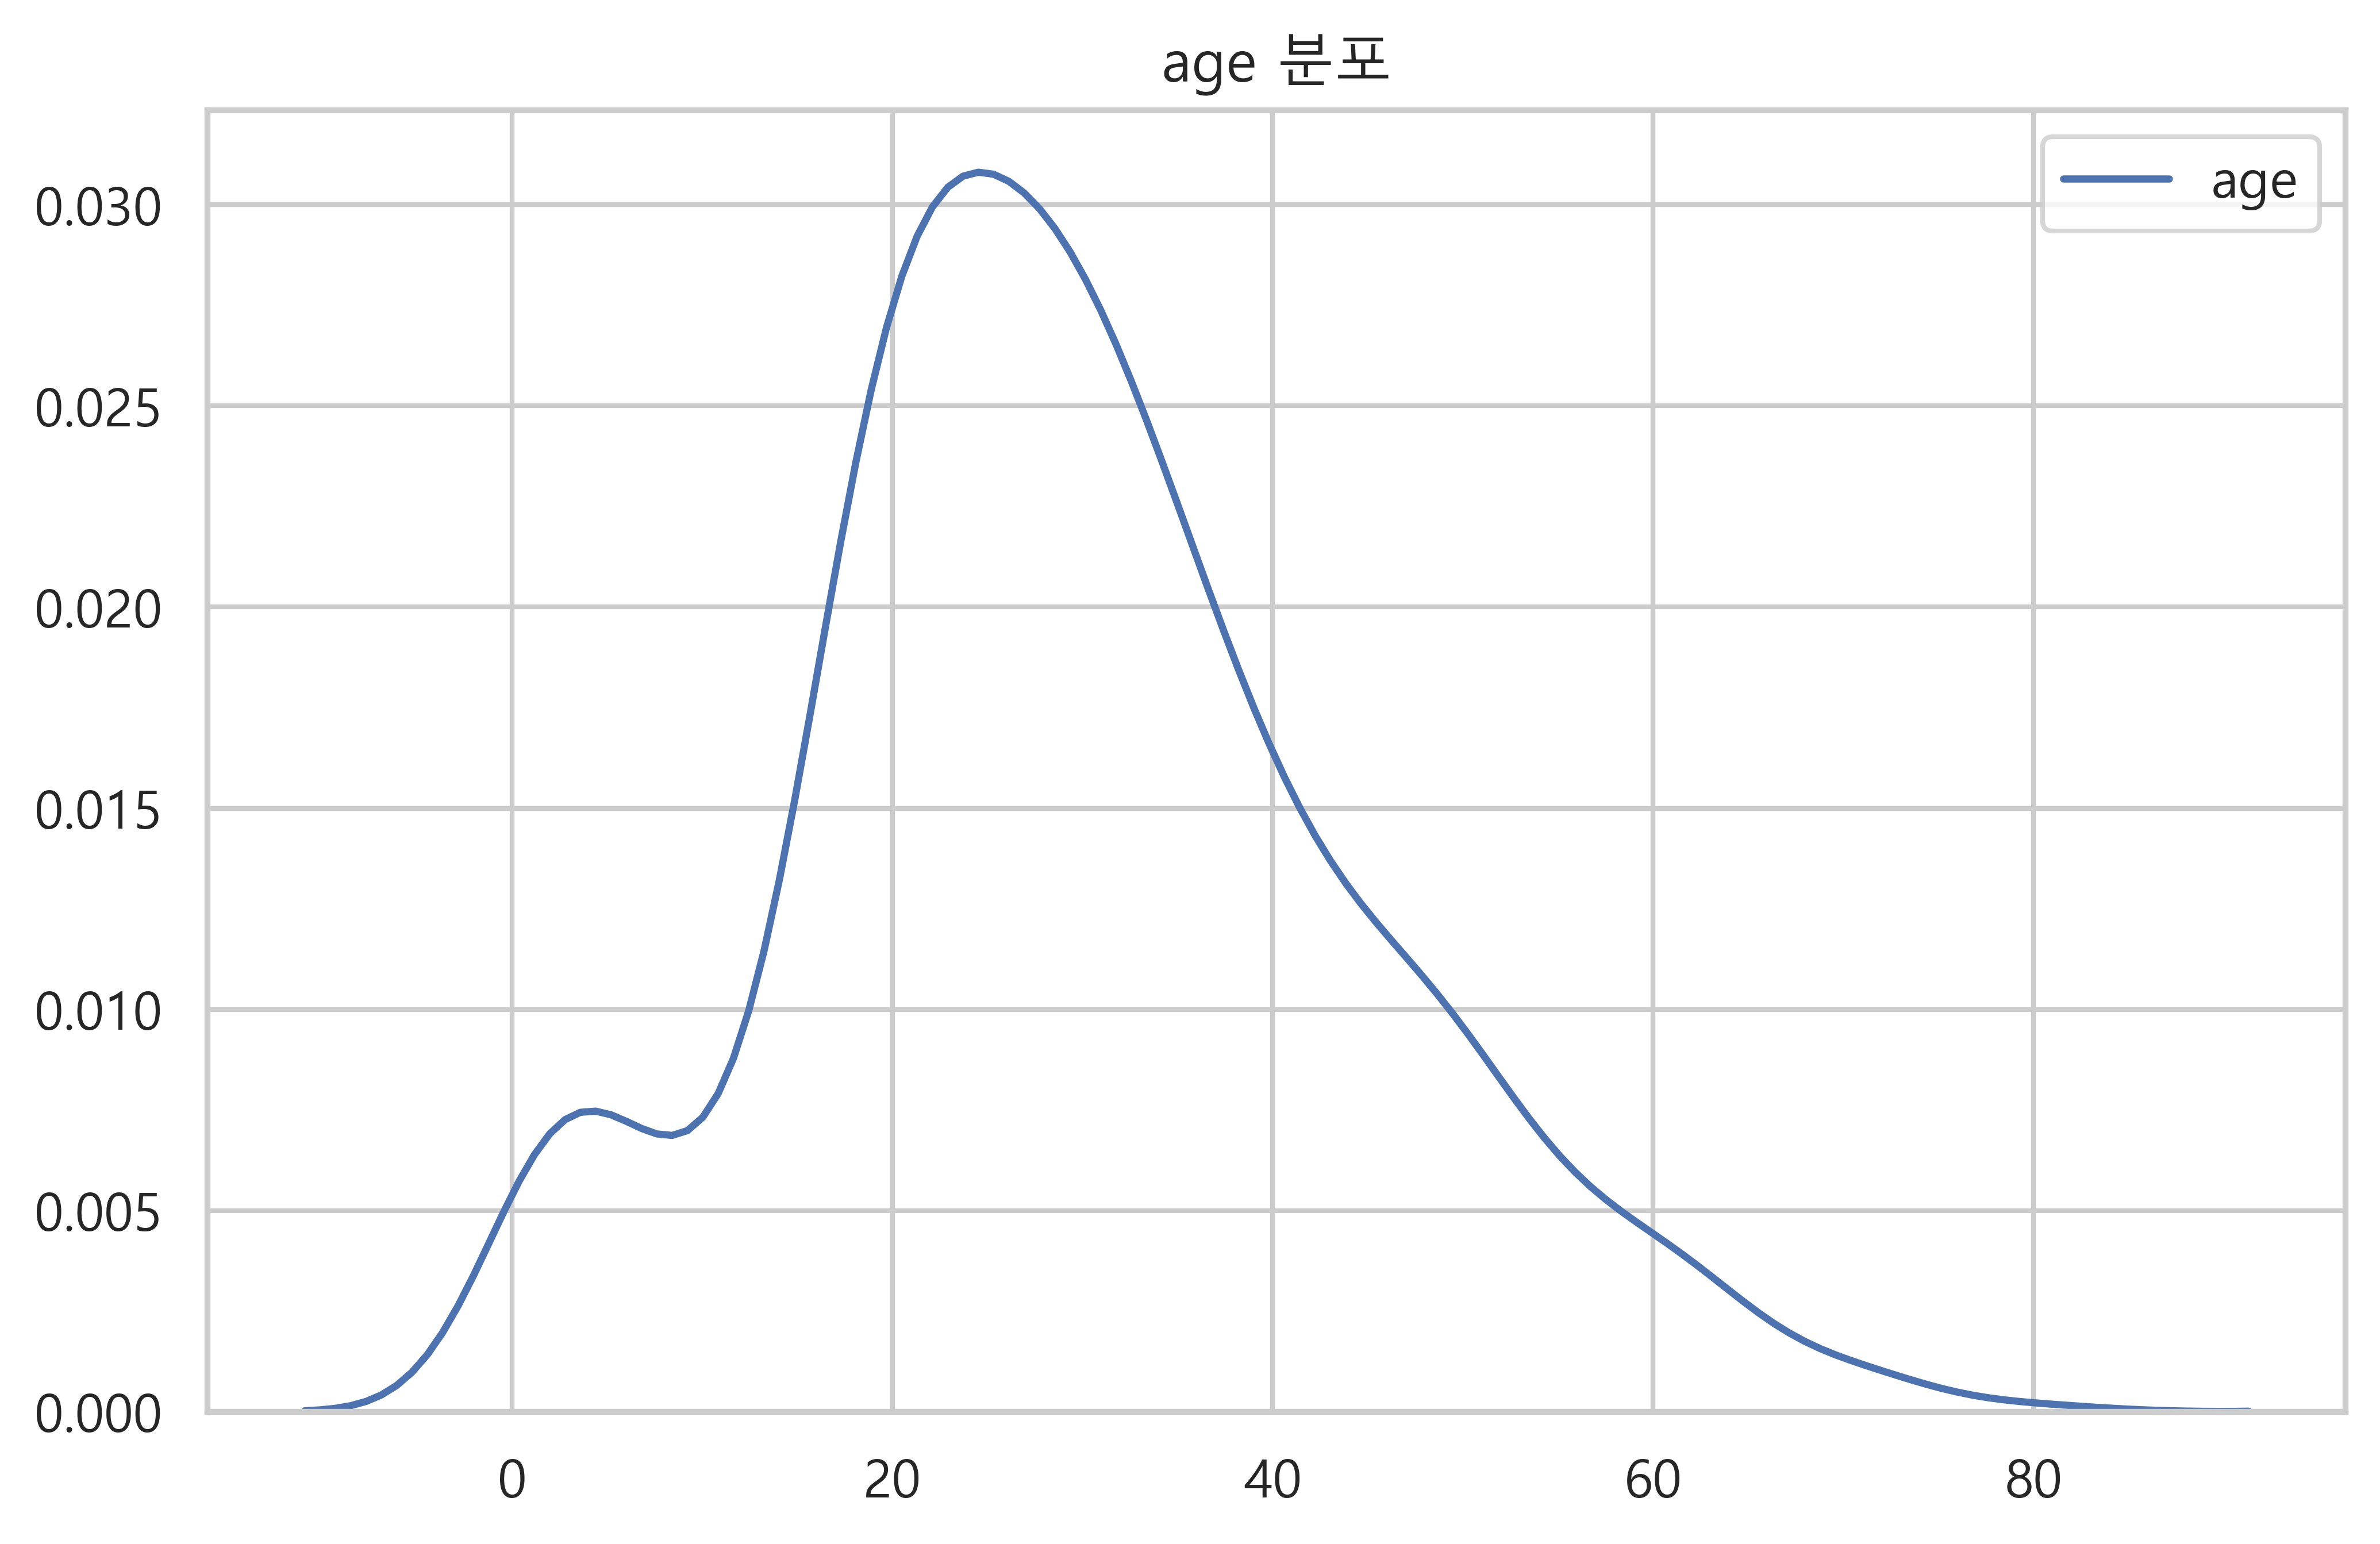

In [10]:
# age imute하기
sns.kdeplot(titanic.age)
plt.title("age 분포")
plt.show()

In [11]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_age.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()

#### pasty
- 원하는 데이터만 선택하거나 새로운 데이터 조합 생성

In [13]:
#demo_data : x로 시작하는 변수에 대해 임의의 실수 데이터 생성
from patsy import demo_data

df = pd.DataFrame(demo_data("x1","x2","x3","x4","x5"))
df

x1        x2        x3        x4        x5
0  1.764052 -0.977278  0.144044  0.333674 -2.552990
1  0.400157  0.950088  1.454274  1.494079  0.653619
2  0.978738 -0.151357  0.761038 -0.205158  0.864436
3  2.240893 -0.103219  0.121675  0.313068 -0.742165
4  1.867558  0.410599  0.443863 -0.854096  2.269755

In [14]:
#dmatrix(formula, data) :모형 정의 문자열 formula와 데이터 프레임 data 입력
from patsy import dmatrix

dmatrix("x1 +x2 + 0", data = df)

DesignMatrix with shape (5, 2)
       x1        x2
  1.76405  -0.97728
  0.40016   0.95009
  0.97874  -0.15136
  2.24089  -0.10322
  1.86756   0.41060
  Terms:
    'x1' (column 0)
    'x2' (column 1)

In [15]:
# 상수항 데이터 추가
dmatrix("x1 + np.log(np.abs(x2))", data=df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [16]:
def mul2(x):
    return x*2

dmatrix("x1 + mul2(x1)", data=df)

DesignMatrix with shape (5, 3)
  Intercept       x1  mul2(x1)
          1  1.76405   3.52810
          1  0.40016   0.80031
          1  0.97874   1.95748
          1  2.24089   4.48179
          1  1.86756   3.73512
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'mul2(x1)' (column 2)

In [17]:
# 상호작용
dmatrix("x1 + x2 + x1:x2+0", data=df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [18]:
#+와: 동시에 표시
dmatrix("x1 * x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [ ]:
# 새로운 컬럼 생성
dmatrix("x1 + x2 + I(x1 + x2) + 0", df)

In [19]:
# 스케일링
# center() : 평균 0으로
# standardize() : 평균 0, 표준편차 1
# scale() : standardize()와 같음

dm = dmatrix("center(x1) + 0", df)
dm


DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [20]:
#평균값 저장된것 확인
#학습이 끝난 후 모형으로 예측할 때 새로운 데이터 전처리할 때 평균값을 빼줘야 하기 때문

dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

In [21]:
#Sklearn으로 스케일링 하기
X = np.arange(7).reshape(-1, 1)  
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)  

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [23]:
# 아웃라이어가 존재하는 경우 중앙값=0, IQR(interquartile range)=1 으로 만들기
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X) #중앙값이 0, IQR이 1이 되도록 변환

array([[-1.        ],
       [-0.66666667],
       [-0.33333333],
       [ 0.        ],
       [ 0.33333333],
       [ 0.66666667],
       [ 1.        ]])

In [25]:
# 입력데이터를 여러개의 다항식으로 변환 가능
# degree: 차수
# include_bias :상수항 여부
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])